In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
# Load your CSV file
data = pd.read_csv("HousingData.csv")
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [9]:
print(data.isnull().sum())


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [11]:
data = data.dropna()


In [13]:
# Assuming 'MEDV' is the target column
X = data.drop("MEDV", axis=1).values
y = data["MEDV"].values.reshape(-1, 1)

# Normalize the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [15]:
# Initialize weights and biases
input_size = X_train.shape[1]
output_size = 1
W = np.random.randn(input_size, output_size)
b = np.zeros((1, output_size))

# Hyperparameters
learning_rate = 0.01
epochs = 500

# Training loop
for epoch in range(epochs):
    # Forward pass
    y_pred = X_train @ W + b

    # Loss calculation: MSE
    loss = np.mean((y_train - y_pred) ** 2)

    # Backward pass
    dW = -2 * X_train.T @ (y_train - y_pred) / X_train.shape[0]
    db = -2 * np.mean(y_train - y_pred, axis=0, keepdims=True)

    # Parameter update
    W -= learning_rate * dW
    b -= learning_rate * db

    # Logging
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 26.2824
Epoch 50, Loss: 2.7532
Epoch 100, Loss: 0.9611
Epoch 150, Loss: 0.4989
Epoch 200, Loss: 0.3534
Epoch 250, Loss: 0.2951
Epoch 300, Loss: 0.2656
Epoch 350, Loss: 0.2478
Epoch 400, Loss: 0.2360
Epoch 450, Loss: 0.2277


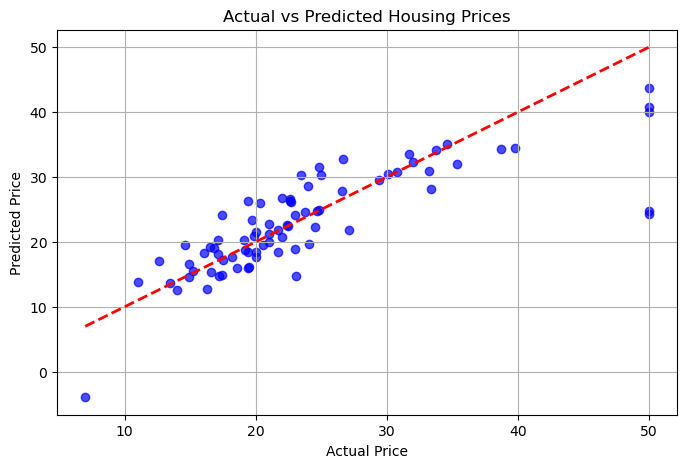

In [17]:
import matplotlib.pyplot as plt

# Predict on test data
y_test_pred = X_test @ W + b

# Invert normalization
y_test_actual = scaler_y.inverse_transform(y_test)
y_pred_actual = scaler_y.inverse_transform(y_test_pred)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.7, color="blue")
plt.plot([y_test_actual.min(), y_test_actual.max()], 
         [y_test_actual.min(), y_test_actual.max()], 
         'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.grid(True)
plt.show()


In [19]:
# Predict and calculate test MSE
y_test_pred = X_test @ W + b
test_loss = np.mean((y_test - y_test_pred) ** 2)
print(f"\nTest Loss (MSE): {test_loss:.4f}")

# Optional: convert scaled predictions back to original scale
y_test_actual = scaler_y.inverse_transform(y_test)
y_pred_actual = scaler_y.inverse_transform(y_test_pred)

# Show some results
for actual, predicted in zip(y_test_actual[:5], y_pred_actual[:5]):
    print(f"Actual: {actual[0]:.2f}, Predicted: {predicted[0]:.2f}")



Test Loss (MSE): 0.3691
Actual: 25.00, Predicted: 30.35
Actual: 18.60, Predicted: 16.03
Actual: 21.00, Predicted: 21.18
Actual: 23.50, Predicted: 30.37
Actual: 17.50, Predicted: 17.25
